## **TUGAS JOBSHEET 12**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installasi tesseract

In [ ]:
!pip install pytesseract
!pip install tesseract
!sudo apt install tesseract-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562550 sha256=9c04ceea6ca97ccfe20062685cf1473bb6f89e7816eb8e1297ca47b54d592677
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 6 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://

In [ ]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [ ]:
IMG_DIR = '/content/drive/MyDrive/images/'

In [ ]:
# get grayscale image
# mengubah gambar berwarna menjadi gambar grayscale
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
# menghilangkan noise atau gangguan pada gambar dengan menerapkan filter median blur
# ilter ini mengganti setiap piksel dengan nilai median dari piksel-piksel di sekitarnya
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
# mengubah gambar grayscale menjadi gambar biner dengan menerapkan thresholding. 
# Thresholding membagi piksel-piksel menjadi dua kategori: 
# piksel yang lebih terang atau sama dengan nilai threshold dianggap sebagai foreground, sedangkan piksel yang lebih gelap dari nilai threshold dianggap sebagai background
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
# memperluas area foreground pada gambar biner dengan menerapkan dilatasi. 
# Dilatasi menambahkan piksel-piksel foreground ke piksel-piksel yang berdekatan dengan foreground.
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
# mempersempit area foreground pada gambar biner dengan menerapkan erosi. 
# Erosi menghilangkan piksel-piksel foreground yang tidak terhubung dengan piksel foreground lainnya
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
# mengkombinasikan erosi dan dilatasi untuk menghilangkan noise dan memperhalus batas-batas objek pada gambar biner.
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
# mendeteksi tepi objek pada gambar grayscale dengan menerapkan deteksi tepi Canny. 
# Algoritma Canny mengidentifikasi piksel-piksel yang berada di tepi objek dengan membandingkan nilai intensitas cahaya 
# dari piksel-piksel tersebut dengan piksel-piksel di sekitarnya.
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
# mengoreksi kemiringan pada gambar dengan memutar gambar berdasarkan sudut kemiringannya. 
# Sudut kemiringan ditentukan dengan menghitung momen inersia dari piksel-piksel foreground pada gambar.
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
# menemukan posisi template pada gambar dengan menerapkan template matching.
# Template matching membandingkan gambar dengan template dan mengembalikan nilai kesamaan antara kedua gambar tersebut.
# Nilai kesamaan yang lebih tinggi menunjukkan bahwa template lebih cocok dengan bagian tertentu pada gambar.
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

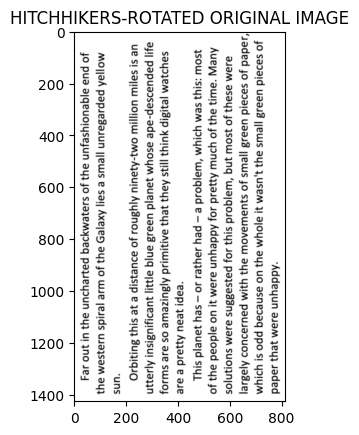

In [ ]:
# Plot original image
# Membaca gambar aurebesh.jpg dari direktori . dan menyimpannya dalam variabel image.
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')
# Membagi gambar image menjadi tiga saluran: biru, hijau, dan merah.
b,g,r = cv2.split(image)
# Menggabungkan saluran biru, hijau, dan merah kembali menjadi satu gambar.
rgb_img = cv2.merge([r,g,b])
# Menampilkan gambar rgb_img pada plot.
plt.imshow(rgb_img)
# Menambahkan judul pada plot.
plt.title('HITCHHIKERS-ROTATED ORIGINAL IMAGE')
# Menampilkan plot.
plt.show()

In [ ]:
def detect_orientation_and_script(image_path):
    # Gunakan Tesseract untuk mendapatkan sudut rotasi dan jenis skrip
    results = pytesseract.image_to_osd(gray, output_type=pytesseract.Output.DICT)

    # Ambil sudut rotasi dari hasil Tesseract
    rotation_angle = results['rotate']

    # Ambil jenis skrip dari hasil Tesseract
    script_type = results['script']

    # Tampilkan hasil
    print(f"Orientasi Teks: {rotation_angle} derajat")
    print(f"Jenis Skrip: {script_type}")

if __name__ == "__main__":
    image_path = '/content/drive/MyDrive/images/hitchhikers-rotated.png'
    detect_orientation_and_script(image_path)


Orientasi Teks: 90 derajat
Jenis Skrip: Latin
